# Goal of the exercise is to cleanup & explore data from the Craigslists auto sales classifields. 
Data is sourced from Kaggle from the following link:
https://www.kaggle.com/austinreese/craigslist-carstrucks-data

Still a WIP...

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%config InlineBackend.figure_format = 'svg'
from mpl_toolkits.basemap import Basemap
sns.set_style("whitegrid")

In [2]:
#Load in the data & create Pandas dataframe
cz_df = pd.read_csv('craigslist-carstrucks-data-v2/craigslistVehiclesFull.csv')

In [3]:
cz_df.head()

url      city  price    year  \
0  https://marshall.craigslist.org/cto/d/2010-dod...  marshall  11900  2010.0   
1  https://marshall.craigslist.org/cto/d/fleetwoo...  marshall   1515  1999.0   
2  https://marshall.craigslist.org/cto/d/2008-for...  marshall  17550  2008.0   
3  https://marshall.craigslist.org/cto/d/ford-tau...  marshall   2800  2004.0   
4  https://marshall.craigslist.org/cto/d/2001-gra...  marshall    400  2001.0   

  manufacturer             make condition    cylinders fuel  odometer  ...  \
0        dodge    challenger se      good  6 cylinders  gas   43600.0  ...   
1          NaN        fleetwood       NaN          NaN  gas       NaN  ...   
2         ford            f-150       NaN          NaN  gas       NaN  ...   
3         ford           taurus      good  6 cylinders  gas  168591.0  ...   
4          NaN  2001 Grand Prix       NaN          NaN  gas  217000.0  ...   

  paint_color                                          image_url      lat  \
0         red  https://images.craigslist.org/00i0i_2ggH1eKDNK...  43.4775   
1         NaN  https://images.craigslist.org/00M0M_irjh7SjEcU...  44.7612   
2         NaN  https://images.craigslist.org/00s0s_eL2XFhEUcx...  44.1415   
3        grey  https://images.craigslist.org/00L0L_5HUR1nQjt8...  43.2845   
4         NaN  https://images.craigslist.org/00n0n_bJJ1XnonSG...  43.0261   

       long county_fips county_name state_fips state_code    state_name  \
0  -96.7041     46083.0     Lincoln       46.0         SD  South Dakota   
1  -96.6907     46039.0       Deuel       46.0         SD  South Dakota   
2 -103.2052     46093.0       Meade       46.0         SD  South Dakota   
3  -95.5930     19143.0     Osceola       19.0         IA          Iowa   
4  -94.4064     19109.0     Kossuth       19.0         IA          Iowa   

   weather  
0     38.0  
1     38.0  
2     38.0  
3     47.0  
4     47.0  

[5 rows x 26 columns]

# The raw dataset contains many statistical outliers in regards to highly unregulated craigslist postings. Price, year & odometer minimums & maximums are likely user error or misinformation. 

In [4]:
cz_df.describe()

price          year      odometer           lat          long  \
count  1.723065e+06  1.716750e+06  1.159011e+06  1.723065e+06  1.723065e+06   
mean   1.075540e+05  2.004841e+03  1.136387e+05  3.878195e+01 -9.371198e+01   
std    1.004439e+07  1.208772e+01  1.368603e+05  5.976412e+00  1.696519e+01   
min    1.000000e+00  3.020000e+02  0.000000e+00 -8.481005e+01 -1.000000e+03   
25%    3.295000e+03  2.002000e+03  5.800000e+04  3.491900e+01 -1.058010e+02   
50%    7.000000e+03  2.007000e+03  1.070000e+05  3.940989e+01 -8.824070e+01   
75%    1.499900e+04  2.012000e+03  1.520000e+05  4.255459e+01 -8.102650e+01   
max    2.068627e+09  2.019000e+03  1.000000e+07  9.000000e+01  1.397061e+02   

        county_fips    state_fips       weather  
count  1.664232e+06  1.664232e+06  1.663637e+06  
mean   2.843053e+04  2.834410e+01  5.378706e+01  
std    1.605423e+04  1.603224e+01  7.799381e+00  
min    1.001000e+03  1.000000e+00  2.900000e+01  
25%    1.212300e+04  1.200000e+01  4.800000e+01  
50%    2.902100e+04  2.900000e+01  5.300000e+01  
75%    4.106700e+04  4.100000e+01  5.900000e+01  
max    5.604500e+04  5.600000e+01  7.900000e+01

# 1.7 million rows of data, 26 columns

In [5]:
cz_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1723065 entries, 0 to 1723064
Data columns (total 26 columns):
url             object
city            object
price           int64
year            float64
manufacturer    object
make            object
condition       object
cylinders       object
fuel            object
odometer        float64
title_status    object
transmission    object
vin             object
drive           object
size            object
type            object
paint_color     object
image_url       object
lat             float64
long            float64
county_fips     float64
county_name     object
state_fips      float64
state_code      object
state_name      object
weather         float64
dtypes: float64(7), int64(1), object(18)
memory usage: 341.8+ MB


# Lets take a look at where these post are coming from using lat & long from a sample of 10,000 shuffled rows

In [6]:
df_shuffled = cz_df.sample(frac=1)
df_shuffled.head()
plt.figure(figsize=(12,6))
m = Basemap(projection='mill',
            llcrnrlat = 25,
            llcrnrlon = -170,
            urcrnrlat = 80,
            urcrnrlon = -60,
            resolution='l')
m.drawcoastlines()
m.drawcountries(linewidth=2)
m.drawstates(color='b')
i = 0
for index, row in df_shuffled.iterrows():
    lat = row['lat']
    lon = row['long']
    xpt, ypt = m(lon, lat)
    m.plot(xpt,ypt,'.',markersize=0.2,c="red")
    # stopping criteria
    i = i + 1
    if (i == 10000): break

## Its time to perform data cleansing 

Drop fields that will not be used for analysis

In [7]:
cz_dropped = cz_df.drop(columns=['url','fuel', 'city','vin','size','image_url','lat','long','county_fips','county_name','state_fips','state_code','state_name','weather'])

Craigslist has many duplicate listings from buyers/bots attempting to sell vehicles

In [10]:
clean_duplicates = cz_dropped.drop_duplicates(keep = 'last')

In [11]:
clean_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1295627 entries, 1 to 1723064
Data columns (total 12 columns):
price           1295627 non-null int64
year            1290077 non-null float64
manufacturer    1184478 non-null object
make            1241194 non-null object
condition       816598 non-null object
cylinders       808206 non-null object
odometer        855050 non-null float64
title_status    1293788 non-null object
transmission    1290449 non-null object
drive           807320 non-null object
type            762614 non-null object
paint_color     790481 non-null object
dtypes: float64(2), int64(1), object(9)
memory usage: 128.5+ MB


## Would only like to include vehicles with manufacturer, make, price, year, title status, condition & odometer readings

In [12]:
clean_df = clean_duplicates.dropna(subset = ['title_status','odometer','condition', 'manufacturer','make','price','year'] )

In [13]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558389 entries, 9 to 1723064
Data columns (total 12 columns):
price           558389 non-null int64
year            558389 non-null float64
manufacturer    558389 non-null object
make            558389 non-null object
condition       558389 non-null object
cylinders       490115 non-null object
odometer        558389 non-null float64
title_status    558389 non-null object
transmission    558266 non-null object
drive           468839 non-null object
type            451241 non-null object
paint_color     458021 non-null object
dtypes: float64(2), int64(1), object(9)
memory usage: 55.4+ MB


Force relevant string fields to lowercase to enable consistent, searchable format

In [14]:
clean_df['manufacturer'] = clean_df['manufacturer'].str.lower()

/home/kenneth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
clean_df['make'] = clean_df['make'].str.lower()

/home/kenneth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Outliers in price, year, & mileage will be removed. Sellers may accidently add an extra 0 to the price, or list the selling price as $0 (Free Car?!)

In [16]:
clean_df.price.quantile(q = 0.999)

95000.0

##  Filter for year > 1979,  $500 > price < $95,000, odometer <300,000 miles

In [17]:
#Filter for year > 1979,  $500 > price < $95,000, odometer <300,000 miles
clean_df = clean_df[(clean_df['year'] > 1979) & (clean_df['year'] < 2020) & (clean_df['price'] < clean_df['price'].quantile(.999)) & (clean_df['price'] > 500) & (clean_df['odometer']<300000)]

In [18]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530372 entries, 9 to 1723064
Data columns (total 12 columns):
price           530372 non-null int64
year            530372 non-null float64
manufacturer    530372 non-null object
make            530372 non-null object
condition       530372 non-null object
cylinders       465595 non-null object
odometer        530372 non-null float64
title_status    530372 non-null object
transmission    530252 non-null object
drive           445113 non-null object
type            428598 non-null object
paint_color     434461 non-null object
dtypes: float64(2), int64(1), object(9)
memory usage: 52.6+ MB


In [19]:
clean_df.describe()

price           year       odometer
count  530372.000000  530372.000000  530372.000000
mean    10029.320490    2006.833849  117483.266223
std      9436.002617       6.598399   63410.461886
min       502.000000    1980.000000       0.000000
25%      3500.000000    2003.000000   71226.750000
50%      6910.000000    2007.000000  119000.000000
75%     13500.000000    2012.000000  160690.000000
max     94994.000000    2019.000000  299999.000000

## Boxplot focusing on price distribution. We can see the quartiles within the plot matching the 25% , 50%, 75% quartiles as described above

In [20]:
plt.figure(figsize=(3,6))
sns.boxplot(y='price', data=clean_df);

A quick look at the histogram distribution for year

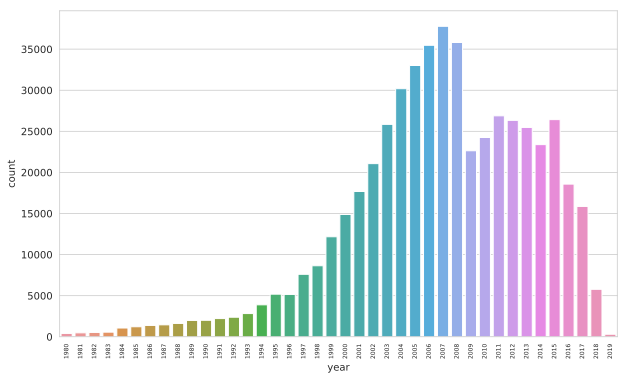

In [21]:
clean_df['year'] = clean_df['year'].astype(int)
plt.figure(figsize=(10,6))
ax = sns.countplot(x= 'year',data=clean_df);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center",fontsize=6);

Text(0.5, 1.0, 'Manufacturers vs no. of listings')

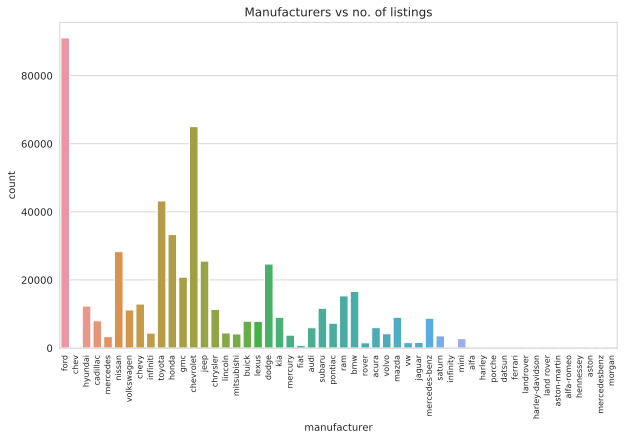

In [22]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x= 'manufacturer',data=clean_df);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center",fontsize=8);
plt.title("Manufacturers vs no. of listings")

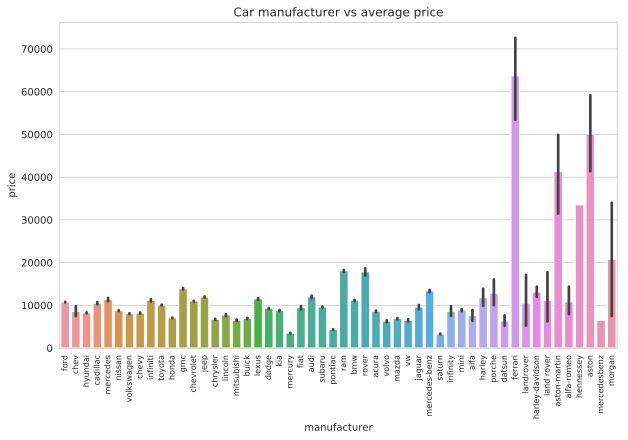

In [23]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x='manufacturer', y='price', data=clean_df);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center",fontsize=8);
plt.title("Car manufacturer vs average price");

Take a quick look at the count of vehicles by transmission...

Text(0.5, 1.0, 'Count by Transmission')

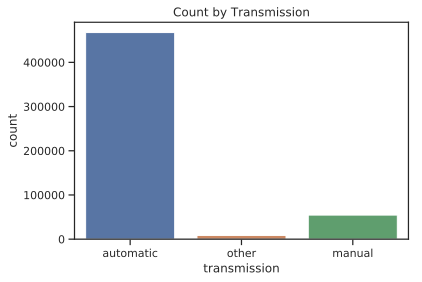

In [29]:
ax = sns.countplot(x='transmission', data=clean_df)
plt.title('Count by Transmission')

## The BMW M3 is my personal favorite series...so lets dive in and take a look at whats available from the Craigslist dataset

In [25]:
bmw_m3 = clean_df[(clean_df['manufacturer'] == 'bmw') & (clean_df['make'] == 'm3')]

In [26]:
bmw_m3.head()

price  year manufacturer make  condition    cylinders  odometer  \
8851   16000  2011          bmw   m3  excellent  8 cylinders   65000.0   
13170  29000  2006          bmw   m3  excellent  6 cylinders   97451.0   
42881  12500  2003          bmw   m3  excellent          NaN  102600.0   
47744  15000  2002          bmw   m3       good  6 cylinders   75000.0   
48052  26000  2010          bmw   m3  excellent  8 cylinders   61000.0   

      title_status transmission drive         type paint_color  
8851       missing       manual   rwd  convertible       black  
13170        clean       manual   rwd        coupe       black  
42881        clean    automatic   rwd  convertible      silver  
47744        clean       manual   rwd  convertible        blue  
48052        clean    automatic   rwd  convertible       black

In [27]:
bmw_m3.describe()

price         year       odometer
count    316.000000   316.000000     316.000000
mean   20079.680380  2004.693038   96778.863924
std    14219.844599     6.032511   56293.330120
min     2000.000000  1988.000000       0.000000
25%     9895.750000  1999.000000   55187.500000
50%    15000.000000  2004.000000   92899.500000
75%    27498.500000  2009.000000  134931.000000
max    79500.000000  2018.000000  266000.000000

/home/kenneth/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/kenneth/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


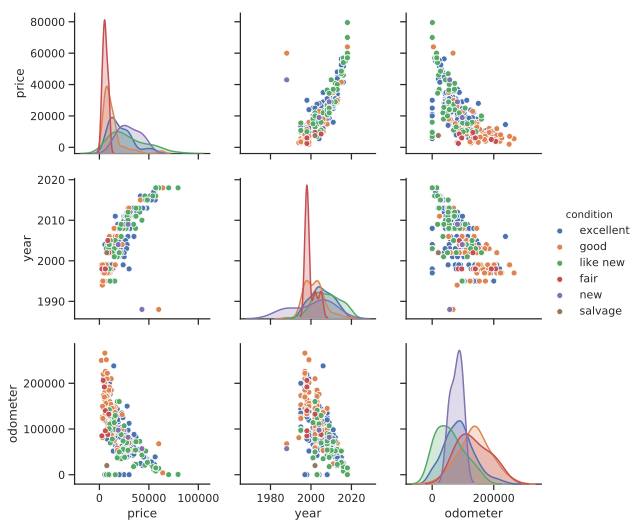

In [28]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(bmw_m3, hue="condition");

Looks like there are owner described "new" & "like new" E30 M3's for sale...For all M3's listed, the median year is 2004 @ 92.9K miles, for $15K. We know classic M3's such as the E30 have appreciated in value over the past few years; thus, if we refer to the price v. year plot, we can see that the price is relatively low once we have entered the E36 territory. How much longer until examples of tracked/abused/high mileage E36's fade out, leaving clean, appreciating high value E36's on the market? (This would require the postings' timestamp over a collection of many years of data)